In [42]:
from sklearn import datasets
import pandas as pd

from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [43]:
iris = datasets.load_iris()

In [44]:
data = pd.DataFrame(iris.data)
target = pd.DataFrame(iris.target)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
target.columns = ['target']

In [45]:
feature = data[['Sepal length','Sepal width']]

In [46]:
feature

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [47]:
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

In [48]:
r = pd.concat([feature, predict],axis=1)
r = pd.concat([r, target],axis=1)

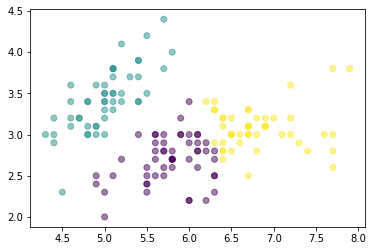

In [49]:
plt.scatter(r['Sepal length'], r['Sepal width'], c=r['predict'], alpha=0.5)
plt.show()

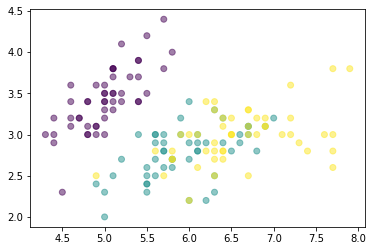

In [50]:
plt.scatter(r['Sepal length'], r['Sepal width'], c=r['target'], alpha=0.5)
plt.show()

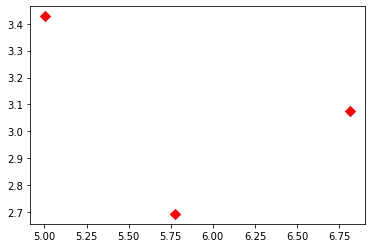

In [51]:
centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length','Sepal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

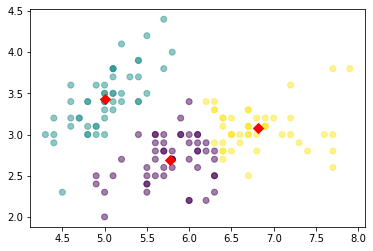

In [52]:
plt.scatter(r['Sepal length'],r['Sepal width'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

In [53]:
print(confusion_matrix(target, predict))
print(accuracy_score(target, predict))

[[ 0 50  0]
 [38  0 12]
 [15  0 35]]
0.23333333333333334
